# Problem Statement:

Why are our best and most experienced employees leaving prematurely? Use this database and try to predict which valuable employees will leave next.

# Data Dictionary:

* satisfaction_level: satisfaction rating on scale of 0 to 1
* last_evaluation: Evaluation rating on scale of 0 to 1
* number_project: Number of projects employee is involved with
* average_montly_hours: Average monthly hrs clocked in last quarte
* time_spend_company: Time spent in the company ( in years)
* Work_accident: Work Accident flag
* promotion_last_5years: Whether the employee was promoted in last 5 years (1=Yes, 0=No)
* sales: Which sales category was his role in, the category sales represents generic sales profile
* salary: Category of the salary

**Target Variable** :

* left: Whether that employee has quit or not ( 1= Yes , 0 = No). This is the target variable

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# 2. Import Datasets

In [2]:
# loading train & test data
train = pd.read_csv('hr_train.csv')
test =  pd.read_csv('hr_test.csv')

# 3. Data Exploration

In [3]:
# display the top 5 rows of the data 
train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [4]:
# display the last 5 rows of the data 
train.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
10494,0.82,0.84,3,237,2,0,0,0,technical,low
10495,0.85,0.81,3,205,3,0,0,0,marketing,high
10496,0.32,0.95,5,172,2,0,1,0,sales,low
10497,0.51,0.76,4,140,3,0,1,0,support,low
10498,0.80,0.68,4,199,2,0,0,0,IT,medium


In [5]:
# display the top 5 rows of the test data
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.10,0.77,6,247,4,0,0,sales,low
3,0.45,0.54,2,135,3,0,0,sales,low
4,0.11,0.81,6,305,4,0,0,sales,low


In [6]:
# display the last 5 rows of the test data 
test.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
4495,0.88,0.61,4,177,4,1,0,support,low
4496,0.11,0.85,7,302,4,0,0,sales,low
4497,1.00,0.88,4,191,4,0,0,technical,low
4498,0.92,0.98,3,257,3,0,1,sales,medium
4499,0.37,0.52,2,155,3,0,0,technical,medium


In [7]:
# check the dimensions of the data 
print("shape of train data:", train.shape)
print("shape of test data:", test.shape)

shape of train data: (10499, 10)
shape of test data: (4500, 9)


### Observation :

* train data has response/target variable as "left", whereas we doesn't have target variable in test set.
* there are 9 input/predictor variables in train & test set.

In [8]:
# list of features in train data 
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [9]:
# list of features in test data 
test.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
# check features & their datatypes in train data 
train.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [11]:
# check features & their datatypes in test data
test.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

### Observations:

* train & test contains both numeric & categorical variables.

In [12]:
# checking presence of missing values in train data 
train.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
# checking presence of missing values in test data 
test.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### Observations:

* Data is clean & no missing values found in both train & test set.

In [14]:
# checking basic information of variables in train data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales                  10499 non-null  object 
 9   salary                 10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB


In [15]:
# checking basic information of variables in test data 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     4500 non-null   float64
 1   last_evaluation        4500 non-null   float64
 2   number_project         4500 non-null   int64  
 3   average_montly_hours   4500 non-null   int64  
 4   time_spend_company     4500 non-null   int64  
 5   Work_accident          4500 non-null   int64  
 6   promotion_last_5years  4500 non-null   int64  
 7   sales                  4500 non-null   object 
 8   salary                 4500 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 316.5+ KB


In [16]:
# checking the no. of unique categories of variables in train data
train.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [17]:
# checking the no. of unique categories of variables in test data 
test.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [18]:
# Let's rename some columns appropriately
train = train.rename(columns={'sales': 'departments', 'Work_accident': 'work_accident'})
test = test.rename(columns={'sales': 'departments', 'Work_accident': 'work_accident'})

In [19]:
# check summary statistics of train (numeric) data 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10499.0,0.612683,0.248578,0.09,0.44,0.64,0.82,1.0
last_evaluation,10499.0,0.717131,0.171483,0.36,0.56,0.72,0.87,1.0
number_project,10499.0,3.808553,1.230572,2.00,3.00,4.00,5.00,7.0
average_montly_hours,10499.0,201.059815,49.959332,96.00,156.00,200.00,245.00,310.0
time_spend_company,10499.0,3.494238,1.453227,2.00,3.00,3.00,4.00,10.0
work_accident,10499.0,0.144299,0.351410,0.00,0.00,0.00,0.00,1.0
left,10499.0,0.292885,0.455108,0.00,0.00,0.00,1.00,1.0
promotion_last_5years,10499.0,0.021716,0.145763,0.00,0.00,0.00,0.00,1.0


In [20]:
# check summary statistics of train (categorical) data
train.describe(include=['object'])

,departments,salary
count,10499,10499
unique,10,3
top,sales,low
freq,2935,5104


In [21]:
# checking class distribution of target variable - 'left
train['left'].value_counts()

0    7424
1    3075
Name: left, dtype: int64

In [22]:
# checking  proportions of  class distribution 
train['left'].value_counts(normalize=True)*100

0    70.711496
1    29.288504
Name: left, dtype: float64

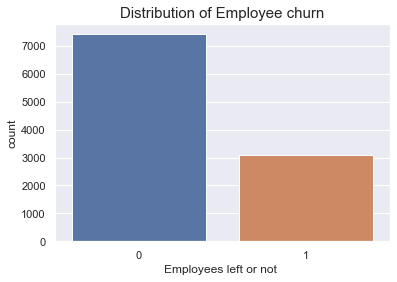

In [23]:
# visual representation of class distribution in target variable
sns.countplot(train['left'])
plt.title("Distribution of Employee churn", fontsize = 15 )
plt.xlabel('Employees left or not ', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.show()

### Observation:

* It's an imbalance data set as the ratio of class distribution in target is around 70:30.
* 70% of employees has left the organisation.

# 4. Analysis

In [24]:
# extracting list of numerical variables
num_variables = train.select_dtypes("number")
num_variables.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [25]:
# extracting list of categorical variables
cat_variables = train.select_dtypes("object")
cat_variables.columns

Index(['departments', 'salary'], dtype='object')

## 4.1 satisfaction_level

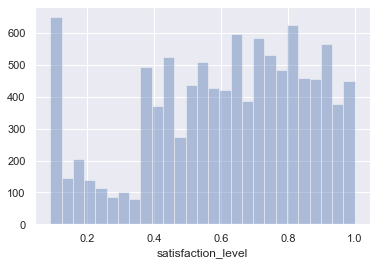

In [27]:
# check distribution of satisfaction_level
sns.distplot(train['satisfaction_level'],  kde=False)

### Observations:

* Satisfation level ranges between 0.09 & 1 .
* satisfaction level of most of the employees lies between 0.4 to 1

In [28]:
# define a function to convert satisfaction_level into 2 categories
def sat_level(satisfaction_level):
    if satisfaction_level < 0.50 :
        return 0
    else:
        return 1

In [29]:
# apply function to change the categories in - satisfaction_level
train['satisfaction_level'] = train['satisfaction_level'].apply(sat_level)
test['satisfaction_level'] = test['satisfaction_level'].apply(sat_level)

In [30]:
# check the count of categories 
train['satisfaction_level'].value_counts()

1    7315
0    3184
Name: satisfaction_level, dtype: int64

## 4.2 last_evaluation

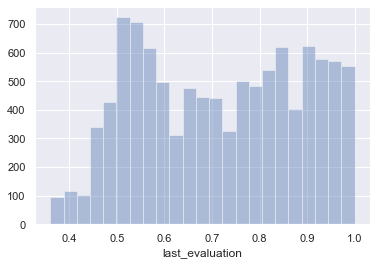

In [31]:
#  check distribution of last_evaluation
sns.distplot(train['last_evaluation'], kde = False)

### Observations:

* last evaluation for employees ranges between 0.3 to 1

In [32]:
# define a function to convert 'last_evaluation' into 2 categories( ie 0 & 1 )
def eval_rating(last_evaluation):
    if last_evaluation < 0.50 :
        return 0
    else:
        return 1

In [33]:
# # apply function to change the categories in - last_evaluation
train['last_evaluation'] = train['last_evaluation'].apply(eval_rating)
test['last_evaluation'] = test['last_evaluation'].apply(eval_rating)

In [34]:
# check the count of categories 
train['last_evaluation'].value_counts()

1    9419
0    1080
Name: last_evaluation, dtype: int64

## 4.3  number_project

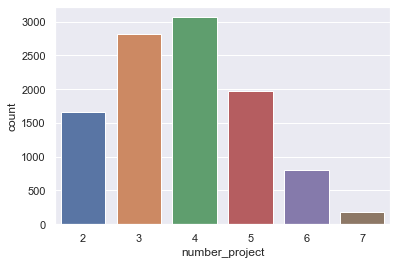

In [35]:
#  check distribution of 'number_project'
sns.countplot(train['number_project'])

In [36]:
# check the proportional distribution of number of projects taken by employees
train['number_project'].value_counts(normalize = True)*100

4    29.212306
3    26.802553
5    18.744642
2    15.820554
6     7.705496
7     1.714449
Name: number_project, dtype: float64

### Observations:

* Most of the employees(around 29%) have involved in at least 4 projects.
* Very less employees have taken more than 5 projects. ie is around 8%

## 4.4 average_montly_hours

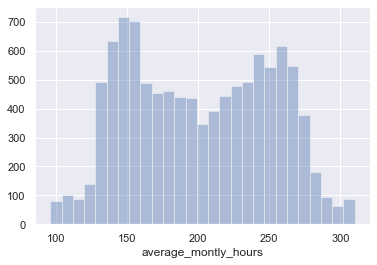

In [37]:
#  check distribution of 'average_montly_hours'
sns.distplot(train['average_montly_hours'], kde = False)

### Observations:

* At least 50% of employees have given avg 200 hour in a month.
* Maximum avg monthly hour given by any employee is 310.

## 4.5 time_spend_company

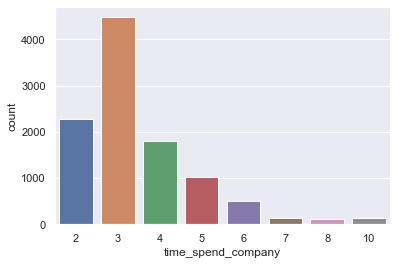

In [38]:
#  check distribution of 'time_spend_company'
sns.countplot(train['time_spend_company'])

In [39]:
# check the proportional distribution of time spend in the company
train['time_spend_company'].value_counts(normalize = True)*100

3     42.699305
2     21.802076
4     17.163539
5      9.819983
6      4.809982
10     1.371559
7      1.276312
8      1.057244
Name: time_spend_company, dtype: float64

### Observations :

* Most of the employees(42%) have spent at least 3 years in the company.
* The number of employees who have spent more than 6 years in the organisation are very rare. ie around 1%.

## 4.6 departments

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

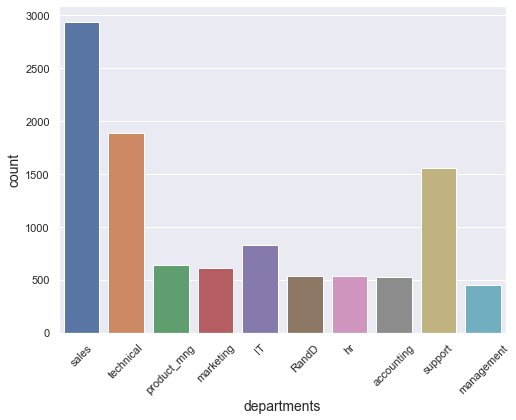

In [40]:
#  check distribution of 'departments'
plt.figure(figsize=(8,6))
sns.countplot(train['departments'])
plt.xlabel('departments', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.xticks(rotation= 45)

In [41]:
# check the proportional distribution of departments
train['departments'].value_counts(normalize = True)*100

sales          27.955043
technical      18.001714
support        14.820459
IT              7.857891
product_mng     6.086294
marketing       5.848176
hr              5.067149
RandD           5.048100
accounting      5.019526
management      4.295647
Name: departments, dtype: float64

### Observations :

* Maximum employees (around 28%) works in sales department.
* Management department has the least number (around 4%) of employees.

## 4.7 salary

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

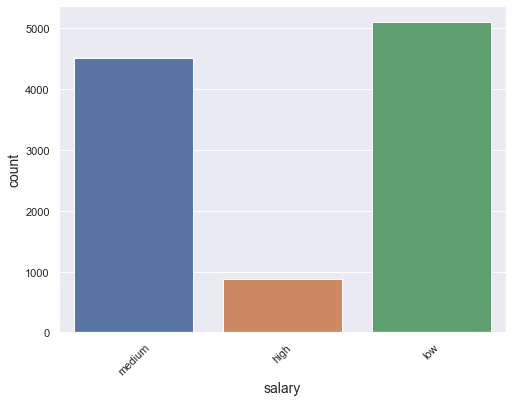

In [42]:
#  check distribution of 'salary'
plt.figure(figsize=(8,6))
sns.countplot(train['salary'])
plt.xlabel('salary', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.xticks(rotation= 45)

In [43]:
# check the proportional distribution of salary
train['salary'].value_counts(normalize = True)*100

low       48.614154
medium    43.004096
high       8.381751
Name: salary, dtype: float64

### Observations:

* Around 49% of employees get low salary followed by medium salary (43%) and high salary(8%).

# 5. Data Pre-processing

**5.1 Dummy Variable creation**

In [44]:
# let's create dummy variables for categorical features - 'departments' & 'salary'

In [45]:
# dummy variable creation in train data
for cols in ['departments','salary']:
             dummies = pd.get_dummies(train[cols], prefix = cols, drop_first = True)
             train = pd.concat([dummies,train], axis = 1)
             train.drop([cols], axis = 1,inplace=True)

In [46]:
# dummy variable creation in test data
for cols in ['departments', 'salary']:
             dummies = pd.get_dummies(test[cols], prefix = cols, drop_first = True)
             test = pd.concat([dummies,test], axis = 1)
             test.drop([cols], axis = 1,inplace=True)

In [47]:
# check the top 5 rows of train data 
train.head()

,salary_low,salary_medium,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0,1,0,0,0,0,0,0,1,0,0,0,0,2,150,3,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,1,1,2,171,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,1,0,5,240,3,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,1,4,213,3,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,1,6,224,4,0,1,0


In [48]:
# check the top 5 rows of test data 
test.head()

,salary_low,salary_medium,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,1,0,0,0,0,0,0,0,1,0,0,0,1,2,157,3,0,0
1,0,1,0,0,0,0,0,0,1,0,0,1,1,5,262,6,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,6,247,4,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,2,135,3,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,6,305,4,0,0


In [49]:
print("shape of train data :", train.shape)
print("shape of test data :", test.shape)

shape of train data : (10499, 19)
shape of test data : (4500, 18)


# 6. Model Building

In [50]:
# defining features & target 
X = train.drop(['left'], axis =1)
y = train['left']

In [51]:
# spliting the train data into training & validation subset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=2, stratify = y)

In [52]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8399, 18) (2100, 18)
(8399,) (2100,)


## 6.1 Logistic Regression 

In [53]:
# initiate and fit the model, then make prediction on validation set
lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced')
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [54]:
# evaluating the model results
Accuracy = accuracy_score(y_test, lr_preds)
Precision = precision_score(y_test, lr_preds)
Recall = recall_score(y_test, lr_preds)
Roc_Auc = roc_auc_score(y_test, lr_preds)

In [55]:
# creating tables with Model names & their scores
Results = pd.DataFrame([['Logistic Regression', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937


## 6.2 SVM Classifier

In [56]:
# initiate and fit the model, then make prediction on validation set
svm = SVC(class_weight = 'balanced')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [57]:
# evaluating the model results
Accuracy = accuracy_score(y_test, svm_preds)
Precision = precision_score(y_test, svm_preds)
Recall = recall_score(y_test, svm_preds)
Roc_Auc = roc_auc_score(y_test, svm_preds)

In [58]:
# creating tables with Model names & their scores
SVM_results = pd.DataFrame([['SVM', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(SVM_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481


## 6.3 Decision Tree

In [59]:
# initiate and fit the model, then make prediction on validation set
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)

In [60]:
# evaluating the model results
Accuracy = accuracy_score(y_test, dt_preds)
Precision = precision_score(y_test, dt_preds)
Recall = recall_score(y_test, dt_preds)
Roc_Auc = roc_auc_score(y_test, dt_preds)

In [61]:
# creating tables with Model names & their scores
DT_results = pd.DataFrame([['Decision Tree', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(DT_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856


## 6.4 Random Forest

In [62]:
# initiate and fit the model, then make prediction on validation set
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [63]:
# evaluating the model results
Accuracy = accuracy_score(y_test, rf_preds)
Precision = precision_score(y_test, rf_preds)
Recall = recall_score(y_test, rf_preds)
Roc_Auc = roc_auc_score(y_test, rf_preds)

In [64]:
# creating tables with Model names & their scores
RF_results = pd.DataFrame([['Random Forest', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(RF_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727


## 6.5 Gradient Boosting

In [65]:
# initiate and fit the model, then make prediction on validation set
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [66]:
# evaluating the model results
Accuracy = accuracy_score(y_test, gb_preds)
Precision = precision_score(y_test, gb_preds)
Recall = recall_score(y_test, gb_preds)
Roc_Auc = roc_auc_score(y_test, gb_preds)

In [67]:
# creating tables with Model names & their scores
GB_results = pd.DataFrame([['Gradient Boosting', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(GB_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727
4,Gradient Boosting,0.866667,0.848233,0.663415,0.807128


## 6.6 XGBoost

In [68]:
# initiate and fit the model, then make prediction on validation set
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [69]:
# evaluating the model results
Accuracy = accuracy_score(y_test, xgb_preds)
Precision = precision_score(y_test, xgb_preds)
Recall = recall_score(y_test, xgb_preds)
Roc_Auc = roc_auc_score(y_test, xgb_preds)

In [70]:
# creating tables with Model names & their scores
XGB_results = pd.DataFrame([['XGBoost', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(XGB_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727
4,Gradient Boosting,0.866667,0.848233,0.663415,0.807128
5,XGBoost,0.865714,0.847599,0.660163,0.805502


## 6.7 Ada Boost

In [71]:
# initiate and fit the model, then make prediction on validation set
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)

In [72]:
# evaluating the model results
Accuracy = accuracy_score(y_test, ab_preds)
Precision = precision_score(y_test, ab_preds)
Recall = recall_score(y_test, ab_preds)
Roc_Auc = roc_auc_score(y_test, ab_preds)

In [73]:
# creating tables with Model names & their scores
AB_results = pd.DataFrame([['AdaBoost', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(AB_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727
4,Gradient Boosting,0.866667,0.848233,0.663415,0.807128
5,XGBoost,0.865714,0.847599,0.660163,0.805502
6,AdaBoost,0.813810,0.730453,0.577236,0.744510


## 6.8 Light GBM

In [74]:
# initiate and fit the model, then make prediction on validation set
lgm = lgb.LGBMClassifier()
lgm.fit(X_train, y_train)
lgm_preds = lgm.predict(X_test)

In [75]:
# evaluating the model results
Accuracy = accuracy_score(y_test, ab_preds)
Precision = precision_score(y_test, ab_preds)
Recall = recall_score(y_test, ab_preds)
Roc_Auc = roc_auc_score(y_test, ab_preds)

In [76]:
# creating tables with Model names & their scores
LG_results = pd.DataFrame([['Light_GBM', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(LG_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727
4,Gradient Boosting,0.866667,0.848233,0.663415,0.807128
5,XGBoost,0.865714,0.847599,0.660163,0.805502
6,AdaBoost,0.813810,0.730453,0.577236,0.744510
7,Light_GBM,0.813810,0.730453,0.577236,0.744510


## Resampling techniques to handle Class imbalance problem

###  Up-sample Minority Class

In [77]:
from sklearn.utils import resample

In [78]:
# Separate majority and minority classes
df_majority = train[train['left']== 0]
df_minority = train[train['left']== 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7424,    # to match majority class
                                 random_state=2) # reproducible results

In [79]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [80]:
# Display new balance class counts
df_upsampled.left.value_counts()

1    7424
0    7424
Name: left, dtype: int64

### Observation :

* Now the class of target variable is balanced ie 50:50

In [81]:
# Separate input features (X) and target variable (y)
X = df_upsampled.drop('left', axis=1)
y = df_upsampled.left

In [82]:
# splitting into training and validatin set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=2, stratify = y)

## Random forest

In [83]:
# initiate and fit the model, then make prediction on validation set
rf_os = RandomForestClassifier()
rf_os.fit(X_train, y_train)
preds_rfos = rf_os.predict(X_test)

In [84]:
# evaluating the model results
Accuracy = accuracy_score(y_test, preds_rfos)
Precision = precision_score(y_test,  preds_rfos)
Recall = recall_score(y_test,  preds_rfos)
Roc_Auc = roc_auc_score(y_test, preds_rfos)

In [85]:
# creating tables with Model names & their scores
OS_results = pd.DataFrame([['Oversampling with RF', Accuracy, Precision, Recall, Roc_Auc]],
            columns= ['Model','Accuracy','Precision','Recall', 'Roc_Auc'])
Results = Results.append(OS_results, ignore_index = True)
Results

,Model,Accuracy,Precision,Recall,Roc_Auc
0,Logistic Regression,0.738571,0.543421,0.671545,0.718937
1,SVM,0.628095,0.402582,0.557724,0.607481
2,Decision Tree,0.800952,0.652713,0.684553,0.766856
3,Random Forest,0.843810,0.783037,0.645528,0.785727
4,Gradient Boosting,0.866667,0.848233,0.663415,0.807128
5,XGBoost,0.865714,0.847599,0.660163,0.805502
6,AdaBoost,0.813810,0.730453,0.577236,0.744510
7,Light_GBM,0.813810,0.730453,0.577236,0.744510
8,Oversampling with RF,0.911448,0.895213,0.931987,0.911448


## Prediction on Test data 

In [89]:
# make predictions for the test dataset with random forest classifier
final_pred = rf_os.predict(test)

In [90]:
## submission dataframe with churn status 
submission = pd.DataFrame()
submission['left']= final_pred
submission.head()

,left
0,1
1,0
2,1
3,1
4,1


In [91]:
submission.to_csv('Hr_churn_prediction.csv', index=False)